In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
!pip install tensorflow==2.5

In [3]:
!pip install keras==2.4.3

In [4]:
dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [5]:
dataset.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,138.672705,3.728215,15.4,44.0,7800.0,5.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,151.688303,18.0,0.8,130.739113,3.874993,11.3,38.0,6000.0,4.120922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.762387,4.944903,9.6,31.0,7500.0,3.265641,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,133.960632,3.462571,11.6,35.0,7300.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [6]:
dataset=dataset.drop(['pot','pcc','ba','cad','ane'],1)##boruta

In [7]:
dataset.shape

(400, 20)

In [8]:
# dataset[['htn','dm','cad','pe','ane']]=dataset[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
# dataset[['rbc','pc']] = dataset[['rbc','pc']].replace(to_replace={'abnormal':0,'normal':1})
# dataset[['pcc','ba']] = dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
# dataset[['appet']] = dataset[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
# dataset['classification']=dataset['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
# dataset.rename(columns={'classification':'class'},inplace=True)

In [9]:
# # Further cleaning
# dataset['pe'] = dataset['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
# dataset['appet'] = dataset['appet'].replace(to_replace='no',value=0)
# dataset['cad'] = dataset['cad'].replace(to_replace='\tno',value=0)
# dataset['dm'] = dataset['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
# dataset.drop('id',axis=1,inplace=True)

In [10]:
dataset.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,hemo,pcv,wc,rc,rbc,pc,htn,dm,appet,pe,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,138.672705,15.4,44.0,7800.0,5.000000,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,151.688303,18.0,0.8,130.739113,11.3,38.0,6000.0,4.120922,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.762387,9.6,31.0,7500.0,3.265641,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,11.2,32.0,6700.0,3.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,133.960632,11.6,35.0,7300.0,4.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [11]:
# # '?' character remove process in the dataset
# for i in ['rc','wc','pcv']:
#     dataset[i] = dataset[i].str.extract('(\d+)').astype(float)

In [12]:
# # Filling missing numeric data in the dataset with mean
# for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
#     dataset[i].fillna(dataset[i].mean(),inplace=True)

In [13]:
dataset.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
hemo     0
pcv      0
wc       0
rc       0
rbc      0
pc       0
htn      0
dm       0
appet    0
pe       0
class    0
dtype: int64

In [14]:
dataset.shape

(400, 20)

In [15]:
#dataset = dataset.dropna(axis=1)

In [16]:
dataset.shape

(400, 20)

In [17]:
dataset.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
hemo     0
pcv      0
wc       0
rc       0
rbc      0
pc       0
htn      0
dm       0
appet    0
pe       0
class    0
dtype: int64

In [18]:
dataset.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,hemo,pcv,wc,rc,rbc,pc,htn,dm,appet,pe,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,138.672705,15.4,44.0,7800.0,5.000000,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,151.688303,18.0,0.8,130.739113,11.3,38.0,6000.0,4.120922,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.762387,9.6,31.0,7500.0,3.265641,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,11.2,32.0,6700.0,3.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,133.960632,11.6,35.0,7300.0,4.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [19]:
dataset

,age,bp,sg,al,su,bgr,bu,sc,sod,hemo,pcv,wc,rc,rbc,pc,htn,dm,appet,pe,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,138.672705,15.4,44.0,7800.0,5.000000,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,151.688303,18.0,0.8,130.739113,11.3,38.0,6000.0,4.120922,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.762387,9.6,31.0,7500.0,3.265641,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,11.2,32.0,6700.0,3.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,133.960632,11.6,35.0,7300.0,4.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,15.7,47.0,6700.0,4.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,16.5,54.0,7800.0,6.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,15.8,49.0,6600.0,5.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,14.2,51.0,7200.0,5.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
dataset.iloc[:,:-1]

,age,bp,sg,al,su,bgr,bu,sc,sod,hemo,pcv,wc,rc,rbc,pc,htn,dm,appet,pe
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,138.672705,15.4,44.0,7800.0,5.000000,0.0,0.0,1.0,1.0,1.0,0.0
1,7.0,50.0,1.020,4.0,0.0,151.688303,18.0,0.8,130.739113,11.3,38.0,6000.0,4.120922,0.0,0.0,0.0,0.0,1.0,0.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.762387,9.6,31.0,7500.0,3.265641,0.0,0.0,0.0,1.0,0.0,0.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,11.2,32.0,6700.0,3.000000,0.0,1.0,1.0,0.0,0.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,133.960632,11.6,35.0,7300.0,4.000000,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,15.7,47.0,6700.0,4.000000,0.0,0.0,0.0,0.0,1.0,0.0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,16.5,54.0,7800.0,6.000000,0.0,0.0,0.0,0.0,1.0,0.0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,15.8,49.0,6600.0,5.000000,0.0,0.0,0.0,0.0,1.0,0.0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,14.2,51.0,7200.0,5.000000,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
dataset.iloc[:,-1]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: float64

In [22]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [23]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_train.shape

(320, 19, 1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [29]:
# SimpleRNN model
import time
start_time = time.time()
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1],1), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics = ['accuracy'])
model.fit(X_train,y_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test, y_test),)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/200
20/20 - 1s - loss: 0.1529 - accuracy: 0.8031 - val_loss: 0.1194 - val_accuracy: 0.8375
Epoch 2/200
20/20 - 0s - loss: 0.1143 - accuracy: 0.8875 - val_loss: 0.0980 - val_accuracy: 0.9000
Epoch 3/200
20/20 - 0s - loss: 0.0994 - accuracy: 0.9000 - val_loss: 0.0866 - val_accuracy: 0.9000
Epoch 4/200
20/20 - 0s - loss: 0.0857 - accuracy: 0.9031 - val_loss: 0.0739 - val_accuracy: 0.9125
Epoch 5/200
20/20 - 0s - loss: 0.0810 - accuracy: 0.9094 - val_loss: 0.0687 - val_accuracy: 0.9125
Epoch 6/200
20/20 - 0s - loss: 0.0785 - accuracy: 0.9062 - val_loss: 0.0613 - val_accuracy: 0.9125
Epoch 7/200
20/20 - 0s - loss: 0.0677 - accuracy: 0.9062 - val_loss: 0.0669 - val_accuracy: 0.9125
Epoch 8/200
20/20 - 0s - loss: 0.0630 - accuracy: 0.9094 - val_loss: 0.0567 - val_accuracy: 0.9500
Epoch 9/200
20/20 - 0s - loss: 0.0598 - accuracy: 0.9312 - val_loss: 0.0487 - val_accuracy: 0.9500
Epoch 10/200
20/20 - 0s - loss: 0.0551 - accuracy: 0.9250 - val_loss: 0.0505 - val_accuracy: 0.9250
Epoch 11/

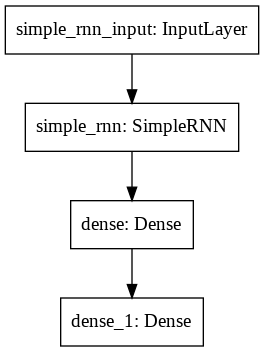

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_simplernn_boruta.png')

In [31]:
# from google.colab import files
# files.download('model_plot_simplernn_boruta.png') 

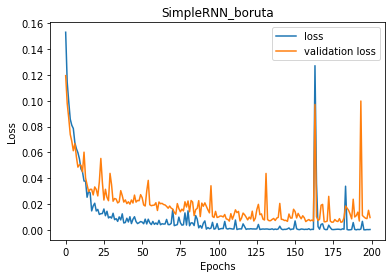

In [32]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('SimpleRNN_boruta')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('SimpleRNN_boruta.png', dpi=100)

In [33]:
# from google.colab import files
# files.download('SimpleRNN_boruta.png') 

In [34]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        28
         1.0       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [37]:
print(confusion_matrix(y_test,predictions))

[[28  0]
 [ 1 51]]


In [38]:
cnf_matrix = [[28, 0],[5, 49]]

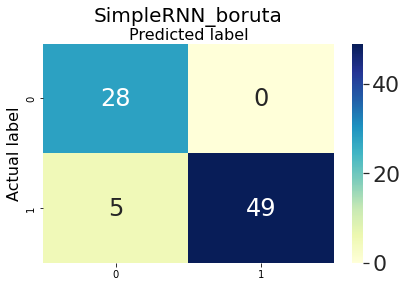

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.set(font_scale = 2)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('SimpleRNN_boruta', fontsize=20)
plt.ylabel('Actual label', fontsize=16)
plt.xlabel('Predicted label', fontsize=16)
plt.savefig('ConfusionMatrix_SimpleRNN_boruta.png', bbox_inches='tight')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
first = 0
second = 50
prediction_accuracy = []
for i in range(8):
  X_test_ = dataset.iloc[first:second,:-1].values
  y_true = dataset.iloc[first:second,-1].values
  X_test_  = scaler.transform(X_test_)
  X_test_ = np.reshape(X_test_, (X_test_.shape[0],X_test_.shape[1],1))
  y_pred = model.predict_classes(X_test_)
  accuracy = accuracy_score(y_true, y_pred)
  prediction_accuracy.append(accuracy)

  first = second
  second = second+50
prediction_accuracy

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

[1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [41]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9903846153846154

Text(0.5, 0, 'False Positive Rate')

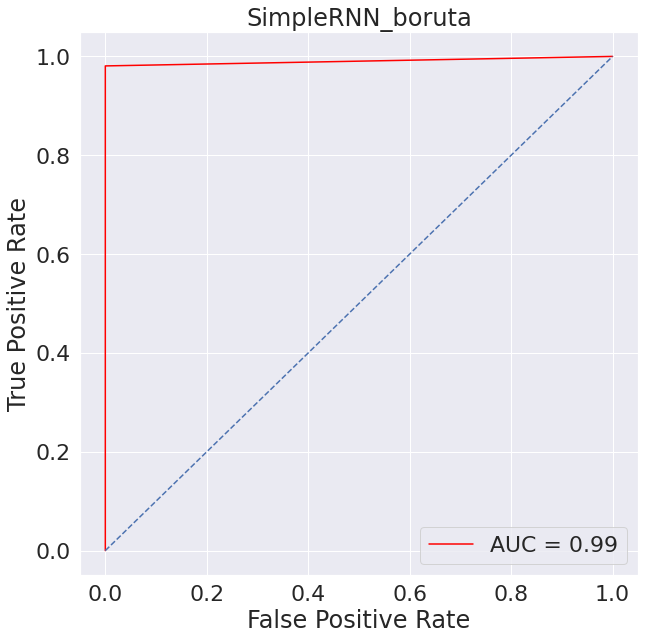

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('SimpleRNN_boruta')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [43]:
data = {
    'SimpleRnn_false': false_positive_rate,
    'SimpleRnn_true': true_positive_rate,
    'SimpleRnn_prediction_accuracy': prediction_accuracy
    }

In [44]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()

In [45]:
df.to_csv('simplernn_boruta_output.csv', index=False)

In [46]:
# from google.colab import files
# files.download('simplernn_boruta_output.csv') 